<a href="https://colab.research.google.com/github/sollall/myidea/blob/master/rdkit%E7%B7%B4%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install condacolab
import condacolab
condacolab.install()

!mamba install -c conda-forge rdkit

from google.colab import output
output.clear()

In [9]:
from rdkit import Chem
from rdkit.Chem import Draw

In [10]:
import urllib.request # URLで指定したファイルをダウンロードするライブラリ

url = 'http://modem.ucsd.edu/adme/data/databases/logS/data_set.dat'
urllib.request.urlretrieve(url, 'water_solubility.txt') 

('water_solubility.txt', <http.client.HTTPMessage at 0x7f9078c9f090>)

In [11]:
import pandas as pd

df1 = pd.read_csv('water_solubility.txt', sep='\t', header=None) # データの読み込み
df1 # 読み込んだデータの確認

,0,1,2
0,O=C(C)N,60-35-5,1.58
1,NNC,60-34-4,1.34
2,O=C(C)O,64-19-7,1.22
3,N1CCCC1,123-75-1,1.15
4,O=C(N)NO,127-07-1,1.12
...,...,...,...
1285,Clc1c(c2c(ccc(Cl)c2Cl)Cl)c(ccc1Cl)Cl,38411-22-2,-8.65
1286,c1c2c(ccc3c2cccc3)cc2c1ccc1ccccc12,53-70-3,-8.66
1287,c1c2c3cccc4ccc5ccc6c(c2c(cc6)cc1)c5c43,191-24-2,-9.03
1288,Clc1c(Cl)c(c2cc(c(c(Cl)c2Cl)Cl)Cl)c(c(c1Cl)Cl)Cl,40186-72-9,-10.26


In [12]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [28]:
import numpy as np
fingerprints = []
safe = []

mols = []
for smile in df1[0]:
    mols.append(Chem.MolFromSmiles(smile))
mols = [Chem.MolFromSmiles(smile) for smile in df1[0]]

bitI_morgan = {}
for mol_idx, mol in enumerate(mols):
    try:
        fingerprint = [x for x in AllChem.GetMorganFingerprintAsBitVect(mol, 2, 2048,bitInfo=bitI_morgan)]
        fingerprints.append(fingerprint)
        safe.append(mol_idx)
    except:
        print("Error", mol_idx)
        continue

fingerprints = np.array(fingerprints)

Error 175


In [14]:
pd.DataFrame(fingerprints).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


R2= 0.9518036387640227
RMSE= 0.4460793838625309
MAE= 0.3144819164797791


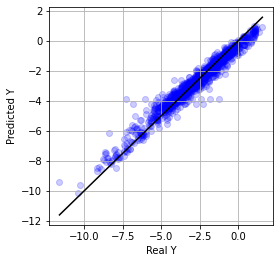

In [15]:
X = fingerprints
Y = df1.iloc[safe, 2]

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X,Y)

from sklearn.metrics import r2_score
print("R2=", r2_score(Y, rf.predict(X)))

import numpy as np
from sklearn.metrics import mean_squared_error
print("RMSE=", np.sqrt(mean_squared_error(Y, rf.predict(X))))

from sklearn.metrics import mean_absolute_error
print("MAE=", mean_absolute_error(Y, rf.predict(X)))

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.scatter(Y, rf.predict(X), alpha=0.2, c="blue")
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], c="black")
plt.grid()
plt.xlabel("Real Y")
plt.ylabel("Predicted Y")
plt.show()

In [ ]:
query_1 = Chem.MolFromSmarts("c1ccccc1")
#検索したい構造をSMARTS記法で表し、query_1というmolオブジェクトとして定義した。
#mols_alpha = list(filter(lambda x: x.HasSubstructMatch(query_1),mols))
mols[0].HasSubstructMatch(query_1)
#query_1の部分構造を有する化合物のデータフレームを作成し、df_1とした。
#mols_alpha

show=[]
for mol in mols:
    try:
        if mol.HasSubstructMatch(query_1):
            show.append(mol)
    except:
        print("error")

Draw.MolsToGridImage(show,
                           molsPerRow=5, #一列に配置する分子の数
                           subImgSize=(200,200),#化合物の下に表示するラベル
                           )

In [39]:
#Draw.DrawMorganBit(mol, bit, bitInfo)
Draw.DrawMorganBit(mols[0],151,bitI_morgan)

ValueError: ignored

In [38]:
print(bitI_morgan)

{151: ((16, 2), (18, 2)), 183: ((3, 2), (2, 2)), 350: ((4, 2), (10, 2)), 366: ((16, 1), (18, 1)), 561: ((0, 1), (5, 1), (7, 1), (11, 1), (12, 1), (13, 1), (15, 1), (19, 1), (20, 1)), 839: ((14, 2), (1, 2)), 875: ((17, 1),), 1011: ((4, 1), (6, 1), (9, 1), (8, 1), (14, 1), (1, 1), (10, 1)), 1362: ((17, 2),), 1380: ((1, 0), (2, 0), (3, 0), (4, 0), (6, 0), (8, 0), (9, 0), (10, 0), (14, 0), (16, 0), (18, 0)), 1598: ((6, 2), (8, 2), (9, 2)), 1683: ((0, 0), (5, 0), (7, 0), (11, 0), (12, 0), (13, 0), (15, 0), (19, 0), (20, 0)), 1747: ((2, 1), (3, 1)), 1873: ((17, 0),)}


In [34]:
morgan_turples = ((fingerprints, bit, bitI_morgan) for bit in list(bitI_morgan.keys())[:12])
Draw.DrawMorganBits(morgan_turples, molsPerRow=4, legends=['bit: '+str(x) for x in list(bitI_morgan.keys())[:12]])

AttributeError: ignored